In [1]:
from jesnk.utils import import_offline_data

data = import_offline_data()

/env2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


keys in data: ['actions', 'infos', 'observations', 'rewards', 'terminals', 'timeouts']


In [2]:
from jesnk.utils import setting_ipynb_mujoco
setting_ipynb_mujoco()

Tue Dec 19 06:58:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.36                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN RTX               On  | 00000000:01:00.0  On |                  N/A |
| 41%   28C    P8              12W / 280W |    947MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import random
import gymnasium as gym
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import mediapy as media


env = gym.make('PointMaze_UMaze-v3', render_mode='rgb_array', reward_type='dense')
env.reset()

n_frames = 120
height = 480
width = 480
frames = []
#import mujoco
# get env's all method
print('env methods:', dir(env))
# get all env's attributes
print('env attributes:', env.__dict__.keys())
print('point_env: ', env.point_env.__dict__.keys())
print('point_env.model: ', env.point_env.model)
print('point_env.data: ', env.point_env.data)
print(env.point_env.data.xpos)
print(env.point_env.data.qpos)

env methods: ['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_action_space', '_cached_spec', '_elapsed_steps', '_is_protocol', '_max_episode_steps', '_metadata', '_np_random', '_observation_space', '_reward_range', '_saved_kwargs', 'action_space', 'class_name', 'close', 'env', 'get_wrapper_attr', 'metadata', 'np_random', 'observation_space', 'render', 'render_mode', 'reset', 'reward_range', 'spec', 'step', 'unwrapped', 'wrapper_spec']
env attributes: dict_keys(['_saved_kwargs', 'env', '_action_space', '_observation_space', '_reward_range', '_metadata', '_cached_spec'

/env2/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.point_env to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.point_env` for environment variables or `env.get_wrapper_attr('point_env')` that will search the reminding wrappers.
  logger.warn(


In [4]:
print(env.reset())
start_i = 1000
n_frames = 500

frames = []
for i in range(start_i, start_i+n_frames):
    env.point_env.data.qpos[:] = data['observations'][i][:2]
    achieved_goal = data['observations'][i][:2]
    desired_goal = data['infos']['goal'][i]
    #env.point_env.data.xpos[1][:2] = data['observations'][i][:2]
    #env.goal = data['infos']['goal'][i]
    #print("data info",env.point_env.data.qpos[:],env.point_env.data.xpos[:])
    #offline_data_point_pose, offline_data_goal = data['observations'][i][:2], data['infos']['goal'][i]
    reward = data['rewards'][i]
    action = data['actions'][i]
    obs, reward, terminated, _, _ = env.step(action)
    #print(offline_data_point_pose, offline_data_goal)
    #print(env.point_env.data.qpos)

    frame = env.render()
    # add reward to frame
    frame = np.array(frame)
    frame = cv2.putText(frame, f"reward: {reward}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    # add achieved goal to frame
    frame = cv2.putText(frame, f"achieved goal: {achieved_goal}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    # add desired goal to frame
    frame = cv2.putText(frame, f"desired goal: {desired_goal}", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    #print(obs)

    frames.append(frame)
media.show_video(frames, fps=30)


({'observation': array([ 0.152, -1.165,  0.   ,  0.   ]), 'achieved_goal': array([ 0.152, -1.165]), 'desired_goal': array([ 0.957, -0.183])}, {'success': False})


In [5]:
data['terminals'][0]


False

[array([2.07 , 3.069], dtype=float32)]


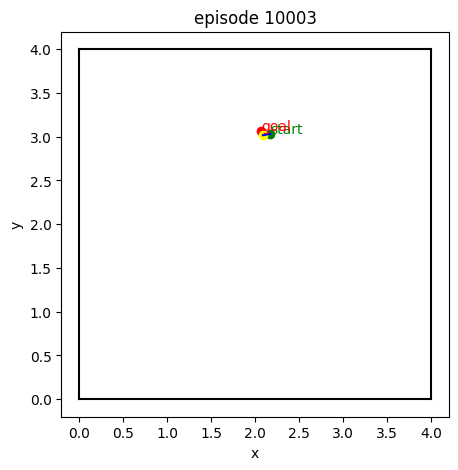

episode done at 10003
[array([3.045, 3.057], dtype=float32)]


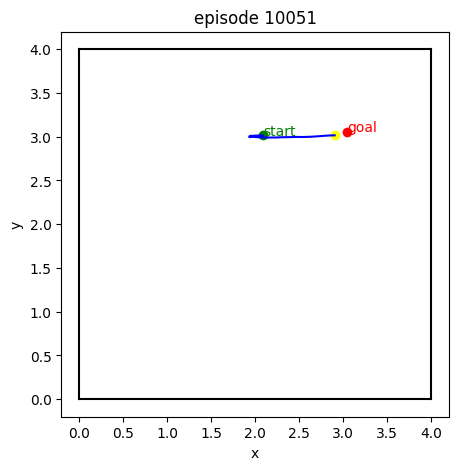

episode done at 10051
[array([3.086, 2.003], dtype=float32)]


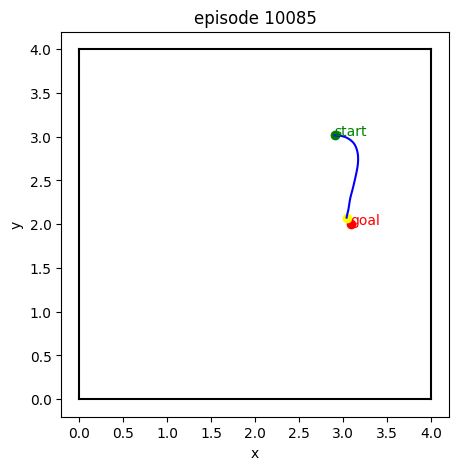

episode done at 10085
[array([1.019, 1.999], dtype=float32)]


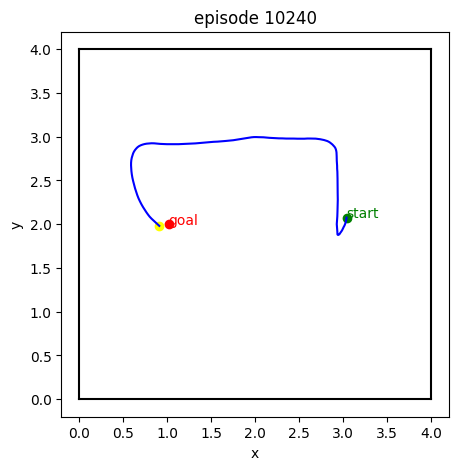

episode done at 10240
[array([1.093, 1.917], dtype=float32)]


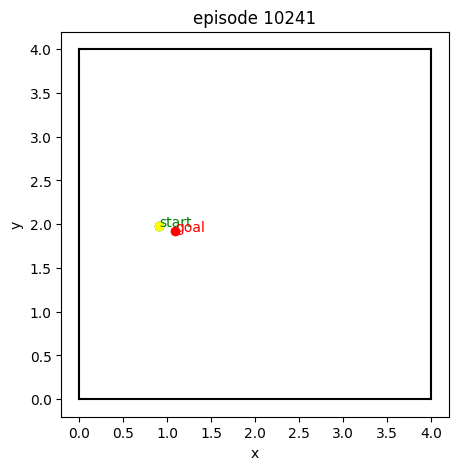

episode done at 10241
[array([0.907, 2.073], dtype=float32)]


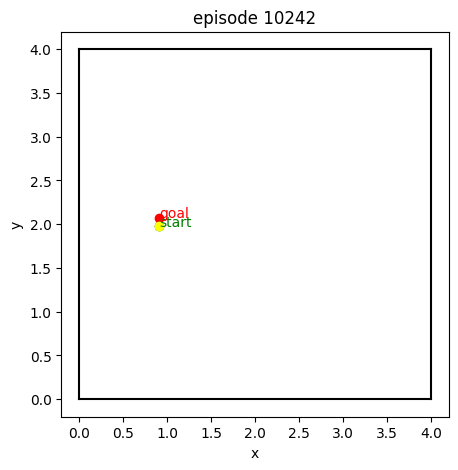

episode done at 10242
[array([3.002, 2.966], dtype=float32)]


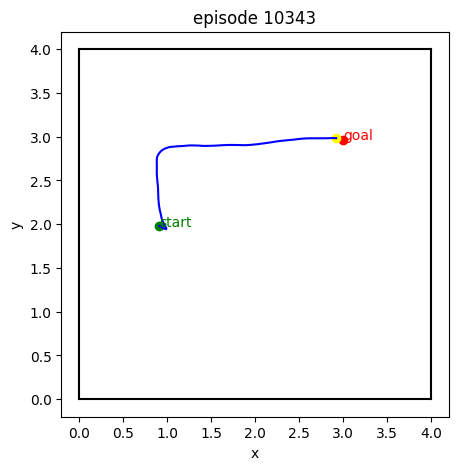

episode done at 10343
[array([3.026, 0.93 ], dtype=float32)]


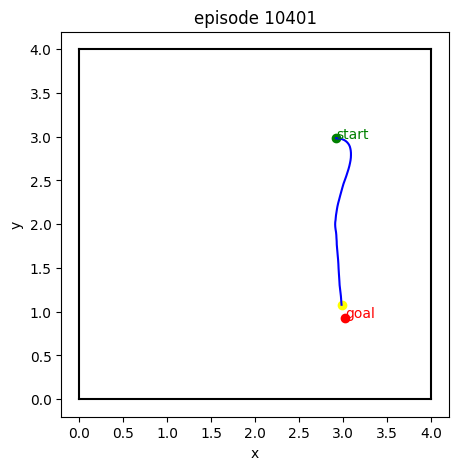

episode done at 10401
[array([2.008, 2.927], dtype=float32)]


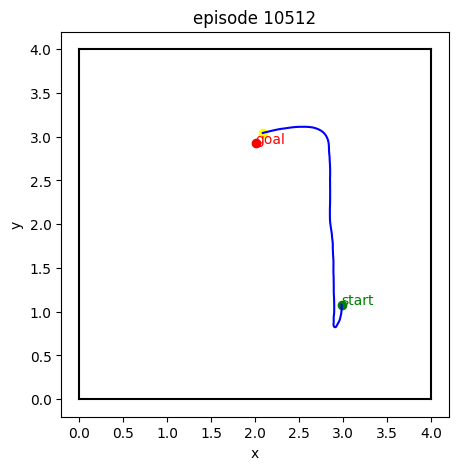

episode done at 10512
[array([0.95 , 1.068], dtype=float32)]


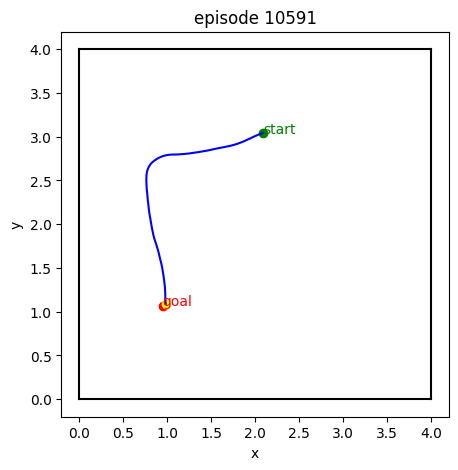

episode done at 10591
[array([3.047, 2.928], dtype=float32)]


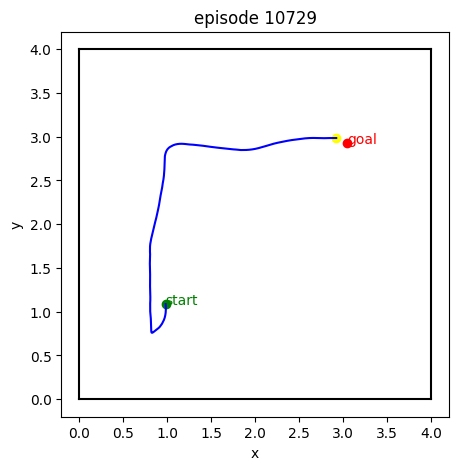

episode done at 10729
[array([2.937, 0.997], dtype=float32)]


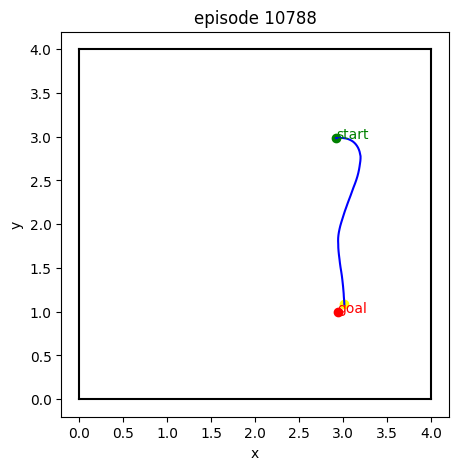

episode done at 10788
[array([3.044, 2.023], dtype=float32)]


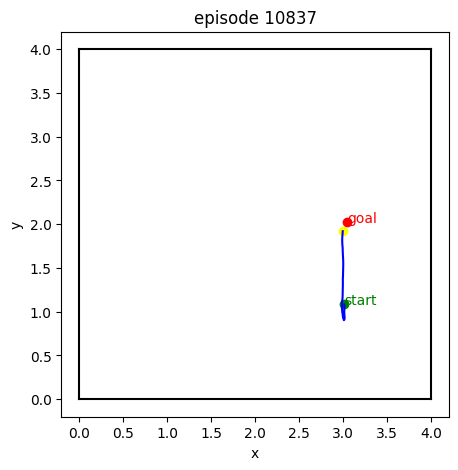

episode done at 10837
[array([1.039, 1.082], dtype=float32)]


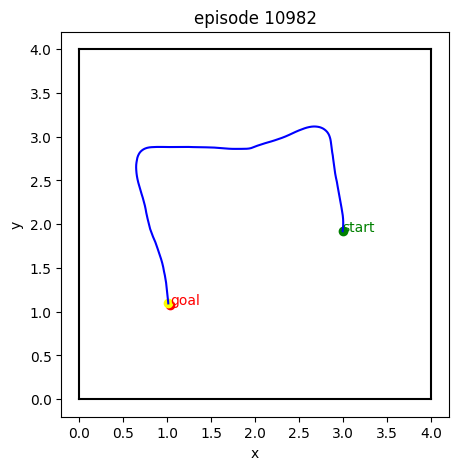

episode done at 10982


In [6]:
# plot map with matplotlib
import matplotlib.pyplot as plt

map_size = ((0,4),(0,4)) # x, y


def init_figure() :
    # draw outline 
    plt.figure(figsize=(5,5))
    plt.plot([map_size[0][0], map_size[0][1]], [map_size[1][0], map_size[1][0]], color='black')
    plt.plot([map_size[0][0], map_size[0][1]], [map_size[1][1], map_size[1][1]], color='black')
    plt.plot([map_size[0][0], map_size[0][0]], [map_size[1][0], map_size[1][1]], color='black')
    plt.plot([map_size[0][1], map_size[0][1]], [map_size[1][0], map_size[1][1]], color='black')
    # set figure size


def plot_trajectory(trajectory, color='blue'):
    # plot trajectory
    plt.plot(trajectory[:,0], trajectory[:,1], color=color)

start_i = 10000
n_frames = 1000
episode_frames = []
episode_agent_states = []
episode_goals = []
episode_start = start_i
episode_done = False
for i in range (start_i, start_i + n_frames) :
    current_agent_pose = data['observations'][i][:2]
    current_goal = data['infos']['goal'][i]
    episode_agent_states.append(current_agent_pose)
    if episode_goals != [] :
        if not np.array_equal(episode_goals[-1], current_goal) :
            episode_goals.append(current_goal)
    else :
        episode_goals.append(current_goal)
    episode_done = data['terminals'][i] or data['timeouts'][i]
    if episode_done :
        # draw trajectory
        init_figure()
        plot_trajectory(np.array(episode_agent_states))
        # draw goals
        for goal in episode_goals :
            plt.scatter(goal[0], goal[1], color='red')
        # draw start
        plt.scatter(episode_agent_states[0][0], episode_agent_states[0][1], color='green')
        # draw end
        plt.scatter(episode_agent_states[-1][0], episode_agent_states[-1][1], color='yellow')
        # add labels that show what meaning of green, yellow, red
        plt.text(episode_agent_states[0][0], episode_agent_states[0][1], 'start', color='green')
        #plt.text(episode_agent_states[-1][0], episode_agent_states[-1][1], 'end', color='yellow')
        print(episode_goals)
        plt.text(episode_goals[-1][0], episode_goals[-1][1], 'goal', color='red')
        
        plt.title(f'episode {i}')
        plt.xlabel('x')
        plt.ylabel('y')
        
        plt.show()
        episode_agent_states = []
        episode_goals = []
        episode_done = False
        print('episode done at', i)


In [7]:
np.sum(data['timeouts'])

12459